The code in `pyldl.applications.lesion_counting` is basically an unofficial implementation of the paper "Joint Acne Image Grading and Counting via Label Distribution Learning" (*ICCV* 2019).

In [1]:
import numpy as np
import pyldl.applications.lesion_counting as lc

In [2]:
X, _, counts = lc.load_acne04('./ACNE04')

In [3]:
counts = lc.preprocessing(counts, sigma=3.)

In [4]:
model = lc.LDL_ACNE()

In [5]:
model.fit(X, counts, epochs=500, learning_rate=1e-4)

I0000 00:00:1712043640.318916   75252 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [6]:
X_test, grades_test, counts_test = lc.load_acne04('./ACNE04', mode='test')

In [7]:
counts_test = lc.preprocessing(counts_test)

In [8]:
grades_pred, counts_pred = model.predict(X_test)

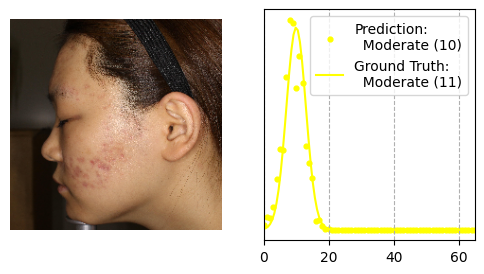

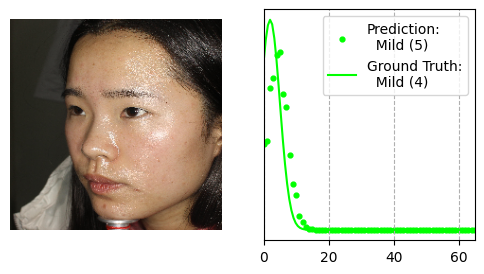

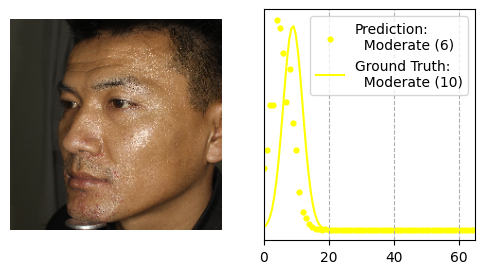

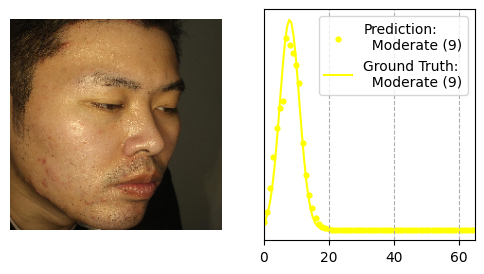

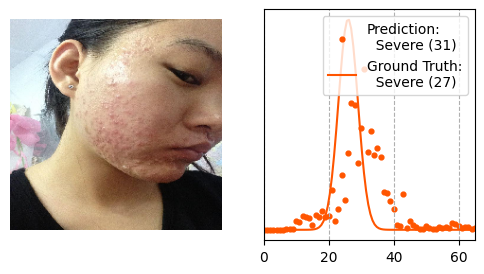

In [9]:
np.random.seed(0)
display = np.random.choice(X_test.shape[0], 5)
for i in display:
    lc.visualization(X_test[i], grades_pred[i], counts_pred[i],
                     grade_real=grades_test[i], count_real=counts_test[i])